<a href="https://www.kaggle.com/code/mesutssmn/possum-gender-prediction?scriptVersionId=132806947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openintro-possum/possum.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,log_loss,f1_score,jaccard_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from tabulate import tabulate

In [3]:
df = pd.read_csv('/kaggle/input/openintro-possum/possum.csv')

In [4]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
#case observation number
#site The site number where the possum was trapped.
#Pop Population, either Vic (Victoria) or other (New South Wales or Queensland).
#sex Gender, either m (male) or f (female).
#age Age.
#hdlngth Head length, in mm.
#skullw Skull width, in mm.
#totlngth Total length, in cm.
#taill Tail length, in cm.
#footlgth foot length

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [8]:
df[df.duplicated()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


In [9]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [12]:
df.nunique()

case        101
site          7
Pop           2
sex           2
age           9
hdlngth      70
skullw       63
totlngth     33
taill        19
footlgth     75
earconch     67
eye          35
chest        19
belly        24
dtype: int64

In [13]:
df.drop('case',axis=1,inplace = True)

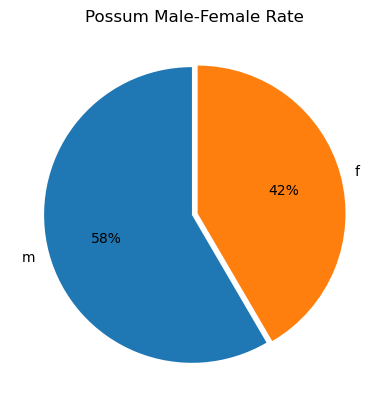

In [14]:
plt.pie(df['sex'].value_counts().values,labels=df['sex'].value_counts().index,autopct="%1.0f%%",explode=(0.02, 0.02),startangle=90)
plt.title("Possum Male-Female Rate")
plt.show()

/tmp/ipykernel_20/2349837151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')


<Axes: >

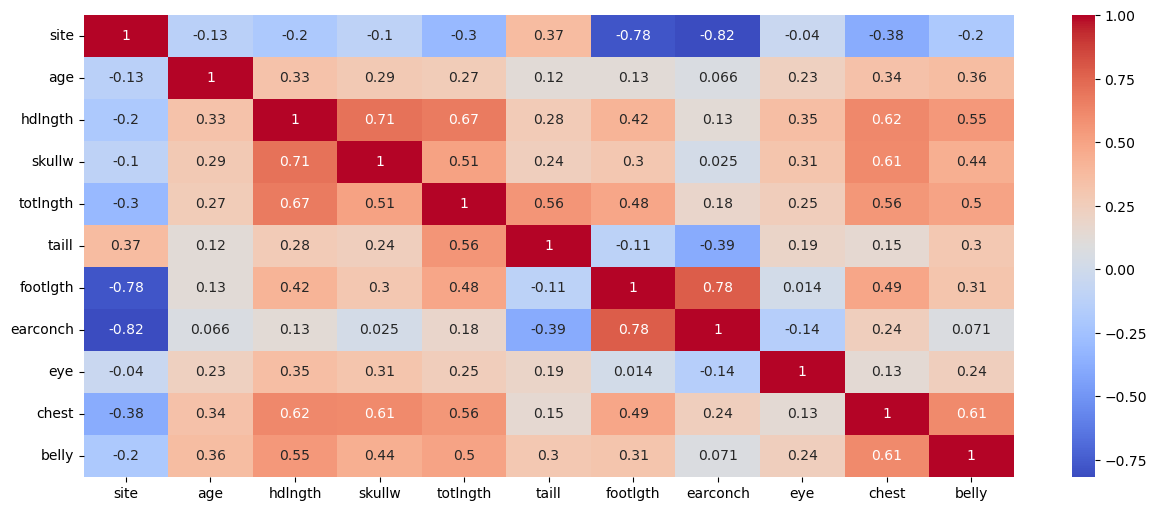

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')

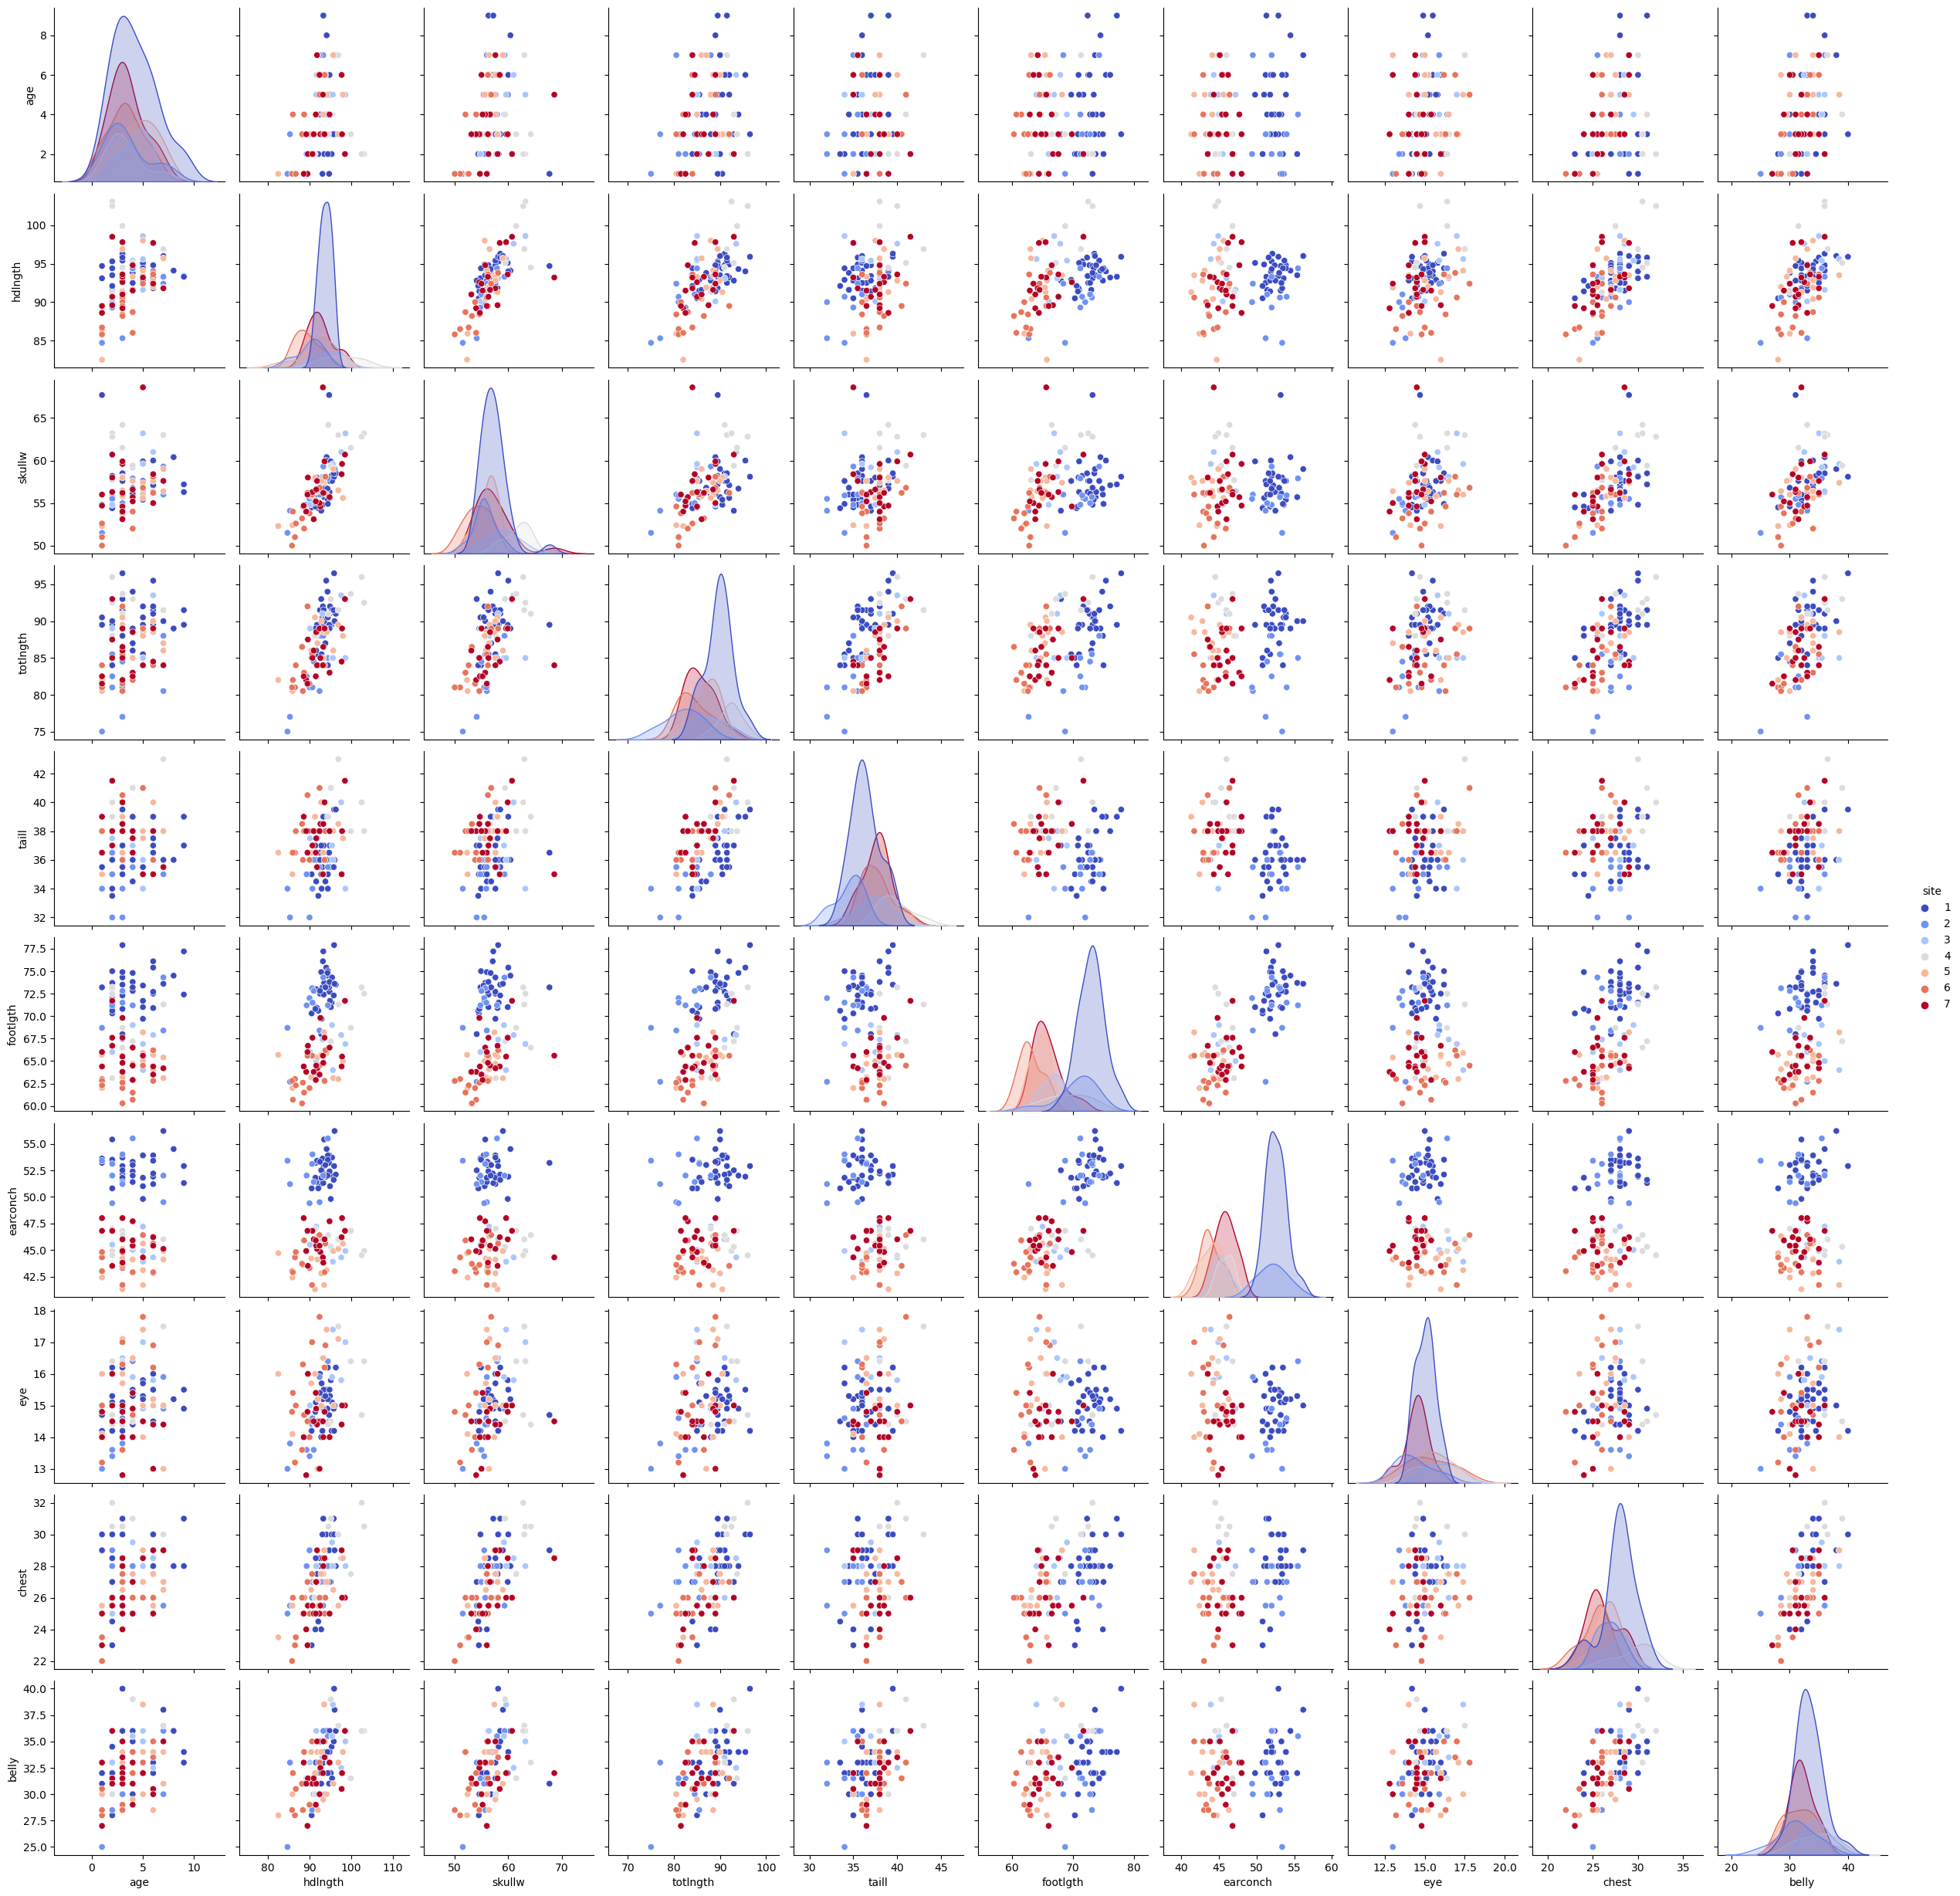

In [16]:
sns.pairplot(df,hue = 'site',palette='coolwarm')

<Axes: xlabel='site', ylabel='count'>

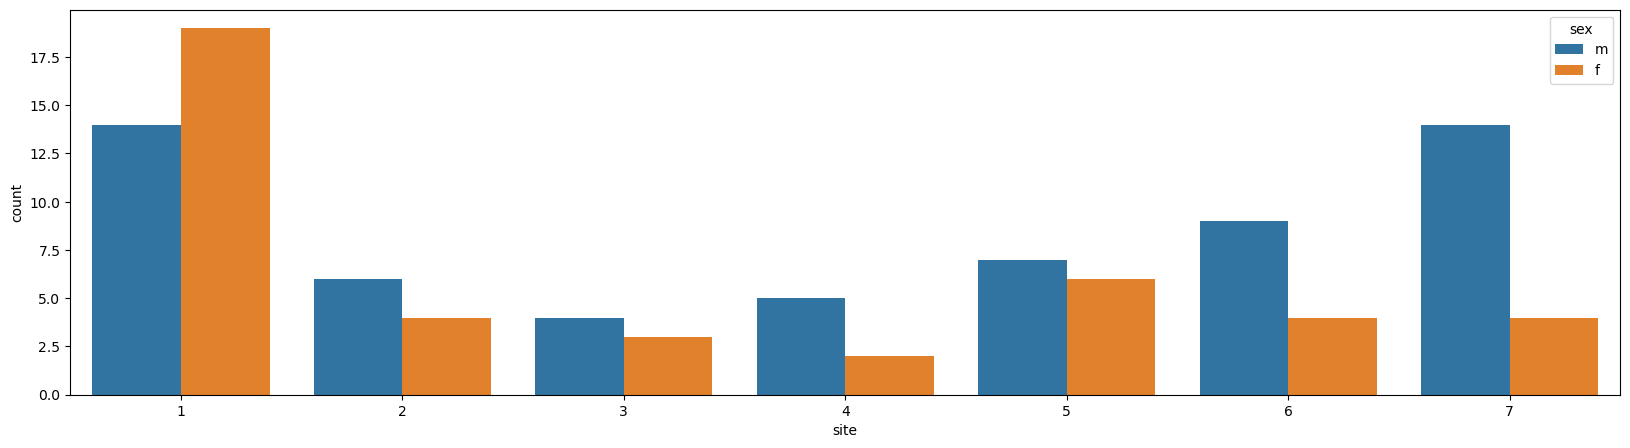

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x = df['site'],hue = df['sex'])

<Axes: xlabel='site', ylabel='count'>

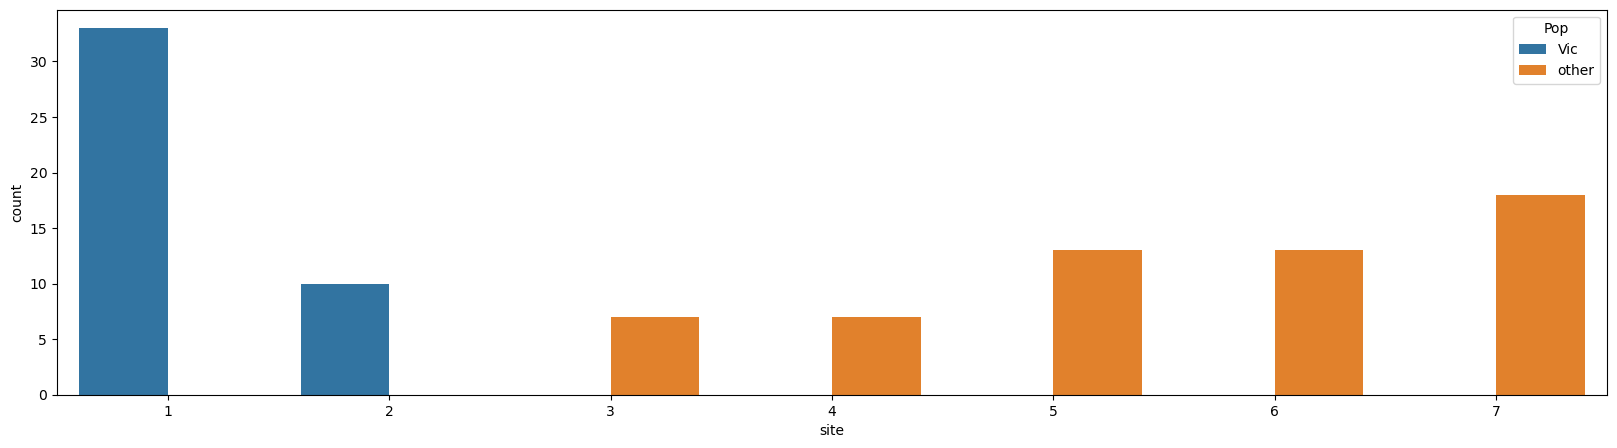

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['site'],hue = df['Pop'])

<Axes: xlabel='chest', ylabel='earconch'>

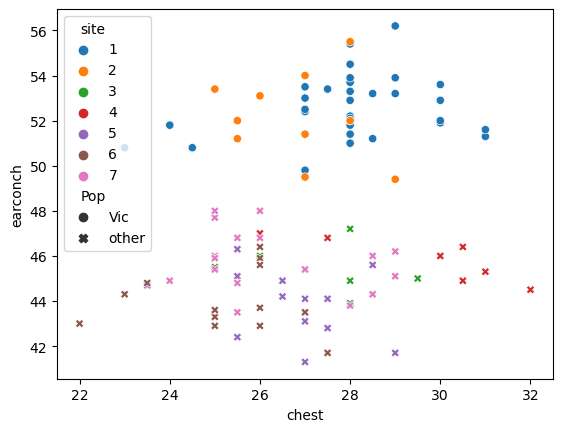

In [19]:
sns.scatterplot(x = df['chest'],y = df['earconch'],hue = df['site'],style=df['Pop'],palette='tab10')

In [20]:
df.head(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


In [21]:
df = pd.get_dummies(df,columns=['site','sex','Pop'],drop_first=True)

In [22]:
df.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,site_2,site_3,site_4,site_5,site_6,site_7,sex_m,Pop_other
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,0,0,0,0,0,1,0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0,0,0,0,0,0,0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0,0,0,0,0,0,0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0,0,0,0,0,0,0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0,0,0,0,0,0,0


In [23]:
y = df['sex_m'].values
X = df.drop('sex_m',axis=1).values

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=91)

In [25]:
y

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=uint8)

In [26]:
rfc = RandomForestClassifier(n_estimators=350,criterion='entropy',max_depth=45)
rfcmodel = rfc.fit(x_train,y_train)
rfcmodel.score(x_test,y_test)

0.7741935483870968

In [27]:
kn = KNeighborsClassifier(n_neighbors=5)
knmodel = kn.fit(x_train,y_train)
knmodel.score(x_test,y_test)

0.7741935483870968

In [28]:
log = LogisticRegression()
logmodel = log.fit(x_train,y_train)
logmodel.score(x_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6451612903225806

In [29]:
SVM = SVC(kernel='poly', random_state = 0)
svmmodel =SVM.fit(x_train, y_train)
svmmodel.score(x_test,y_test)

0.5806451612903226

In [30]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5,random_state=30)
treemodel =Tree.fit(x_train,y_train)
treemodel.score(x_test,y_test)

0.6129032258064516

In [31]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', MinMaxScaler()),('LogisticRegression', LogisticRegression())])
pipe.score(x_test, y_test)

0.7741935483870968

## Predictions and Confusion Matrixs 

In [32]:
y_predrfc = rfcmodel.predict(x_test)
confusion_matrix(y_test,y_predrfc)

array([[ 6,  7],
       [ 0, 18]])

In [33]:
y_predknn = knmodel.predict(x_test)
confusion_matrix(y_test,y_predknn)

array([[10,  3],
       [ 4, 14]])

In [34]:
y_predlog = logmodel.predict(x_test)
confusion_matrix(y_test,y_predlog)

array([[ 7,  6],
       [ 5, 13]])

In [35]:
y_predsvm = svmmodel.predict(x_test)
confusion_matrix(y_test,y_predsvm)

array([[ 0, 13],
       [ 0, 18]])

In [36]:
y_predtree = treemodel.predict(x_test)
confusion_matrix(y_test,y_predtree)

array([[ 2, 11],
       [ 1, 17]])

In [37]:
rfcmodel.predict([[4, 60, 70, 75, 30, 60, 50, 12, 25, 25, 1, 0, 0, 0, 0, 0, 1]])

array([1], dtype=uint8)

In [38]:
pipe.predict([[4, 60, 70, 75, 30, 60, 50, 12, 25, 25, 1, 0, 0, 0, 0, 0, 1]])

array([1], dtype=uint8)

In [39]:
knmodel.predict([[4, 60, 70, 75, 30, 60, 50, 12, 25, 25, 1, 0, 0, 0, 0, 0, 1]])

array([1], dtype=uint8)

In [40]:
logmodel.predict([[4, 60, 70, 75, 30, 60, 50, 12, 25, 25, 1, 0, 0, 0, 0, 0, 1]])

array([1], dtype=uint8)

In [41]:
svmmodel.predict([[4, 60, 70, 75, 30, 60, 50, 12, 25, 25, 1, 0, 0, 0, 0, 0, 1]])

array([1], dtype=uint8)

In [42]:
treemodel.predict([[4, 60, 70, 75, 30, 60, 50, 12, 25, 25, 1, 0, 0, 0, 0, 0, 1]])

array([0], dtype=uint8)

## Error values

In [43]:
LR_Accuracy_Score = accuracy_score(y_test,y_predlog)
LR_JaccardIndex = jaccard_score(y_test,y_predlog)
LR_F1_Score = f1_score(y_test,y_predlog)
LR_Log_Loss = log_loss(y_test,y_predlog)

In [44]:
print(f"LR_Accuracy_Score is :{LR_Accuracy_Score},LR_JaccardIndex is :{LR_JaccardIndex},LR_F1_Score is :{LR_F1_Score},LR_Log_Loss is :{LR_Log_Loss}")

LR_Accuracy_Score is :0.6451612903225806,LR_JaccardIndex is :0.5416666666666666,LR_F1_Score is :0.7027027027027027,LR_Log_Loss is :12.789683460654473


In [45]:
KNN_Accuracy_Score = accuracy_score(y_test,y_predknn)
KNN_JaccardIndex = jaccard_score(y_test,y_predknn)
KNN_F1_Score = f1_score(y_test,y_predknn)

In [46]:
print(f"KNN_Accuracy_Score is :{KNN_Accuracy_Score},KNN_JaccardIndex is :{KNN_JaccardIndex},KNN_F1_Score is :{KNN_F1_Score}")

KNN_Accuracy_Score is :0.7741935483870968,KNN_JaccardIndex is :0.6666666666666666,KNN_F1_Score is :0.7999999999999999


In [47]:
SVM_Accuracy_Score = accuracy_score(y_test,y_predsvm)
SVM_JaccardIndex = jaccard_score(y_test,y_predsvm)
SVM_F1_Score = f1_score(y_test,y_predsvm)

In [48]:
print(f"SVM_Accuracy_Score is :{SVM_Accuracy_Score},SVM_JaccardIndex is :{SVM_JaccardIndex},SVM_F1_Score is :{SVM_F1_Score}")

SVM_Accuracy_Score is :0.5806451612903226,SVM_JaccardIndex is :0.5806451612903226,SVM_F1_Score is :0.7346938775510204


In [49]:
RFC_Accuracy_Score = accuracy_score(y_test,y_predrfc)
RFC_JaccardIndex = jaccard_score(y_test,y_predrfc)
RFC_F1_Score = f1_score(y_test,y_predrfc)

In [50]:
print(f"RFC_Accuracy_Score is :{RFC_Accuracy_Score},RFC_JaccardIndex is :{RFC_JaccardIndex},RFC_F1_Score is :{RFC_F1_Score}")

RFC_Accuracy_Score is :0.7741935483870968,RFC_JaccardIndex is :0.72,RFC_F1_Score is :0.8372093023255813


In [51]:
Tree_Accuracy_Score = accuracy_score(y_test,y_predtree)
Tree_JaccardIndex = jaccard_score(y_test,y_predtree)
Tree_F1_Score = f1_score(y_test,y_predtree)

In [52]:
print(f"Tree_Accuracy_Score is :{Tree_Accuracy_Score},Tree_JaccardIndex is :{Tree_JaccardIndex},Tree_F1_Score is :{Tree_F1_Score}")

Tree_Accuracy_Score is :0.6129032258064516,Tree_JaccardIndex is :0.5862068965517241,Tree_F1_Score is :0.7391304347826088


In [53]:
d = {'KNN':[KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,'-'],
     'Tree':[Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score,'-'],
     'LR':[LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score,LR_Log_Loss],
     'SVM':[SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score,'-'],
     'RFC':[RFC_Accuracy_Score, RFC_JaccardIndex, RFC_F1_Score,'-']}
Report = pd.DataFrame(data=d, index = ['Accuracy','Jaccard Index','F1-Score','Log Loss']).T
print(tabulate(Report, headers = 'keys', tablefmt = 'psql'))

+------+------------+-----------------+------------+--------------------+
|      |   Accuracy |   Jaccard Index |   F1-Score | Log Loss           |
|------+------------+-----------------+------------+--------------------|
| KNN  |   0.774194 |        0.666667 |   0.8      | -                  |
| Tree |   0.612903 |        0.586207 |   0.73913  | -                  |
| LR   |   0.645161 |        0.541667 |   0.702703 | 12.789683460654473 |
| SVM  |   0.580645 |        0.580645 |   0.734694 | -                  |
| RFC  |   0.774194 |        0.72     |   0.837209 | -                  |
+------+------------+-----------------+------------+--------------------+
